1. 自注意力
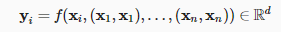
2. 位置编码
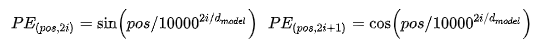
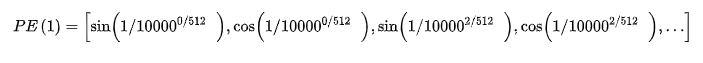

* 相对位置信息：
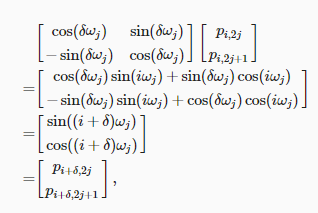

In [1]:
import math
import torch
from torch import nn
import dltools

In [2]:
num_hiddens, num_heads = 100, 5
attention = dltools.MultiHeadAttention(num_hiddens, num_hiddens, num_hiddens,num_hiddens, num_heads, 0.5)
attention.eval()

MultiHeadAttention(
  (attention): DotProductAttention(
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (W_q): Linear(in_features=100, out_features=100, bias=False)
  (W_k): Linear(in_features=100, out_features=100, bias=False)
  (W_v): Linear(in_features=100, out_features=100, bias=False)
  (W_o): Linear(in_features=100, out_features=100, bias=False)
)

In [11]:
batch_size, num_queries, valid_lens = 2, 4, torch.tensor([3, 2])
X = torch.ones((batch_size, num_queries, num_hiddens))
attention(X, X, X, valid_lens).shape

torch.Size([2, 4, 100])

In [18]:
# position encoding
class PositionalEncoding(nn.Module):
    """位置编码"""
    def __init__(self, num_hiddens, dropout, max_len=1000): # 这里的num_hiddens是encoding_dim
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(dropout)
        # 创建一个足够长的P token embeding长度
        self.P = torch.zeros((1, max_len, num_hiddens))
        print("创建一个足够长的P")
        print(self.P.shape)
        print(self.P)
        X = torch.arange(max_len, dtype=torch.float32).reshape(-1, 1) / torch.pow(10000, torch.arange(0, num_hiddens, 2, dtype=torch.float32) / num_hiddens)
        print("创建P过程中用到的X")
        print(X)
        print(X.shape)
        self.P[:, :, 0::2] = torch.sin(X)
        self.P[:, :, 1::2] = torch.cos(X)
#         print(torch.sin(X))
#         print(torch.cos(X))
        print("创建之后的P")
        print(self.P)

    
    def forward(self, X):
        print("forward中编码之前的X")
        print(X.shape)
        print(X)
        X = X + self.P[:, :X.shape[1], :].to(X.device)
        print("编码之后的X")
        print(X.shape)
        print(X)
        return self.dropout(X)

创建一个足够长的P
torch.Size([1, 1000, 32])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
创建P过程中用到的X
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.0000e+00, 5.6234e-01, 3.1623e-01,  ..., 5.6234e-04, 3.1623e-04,
         1.7783e-04],
        [2.0000e+00, 1.1247e+00, 6.3246e-01,  ..., 1.1247e-03, 6.3246e-04,
         3.5566e-04],
        ...,
        [9.9700e+02, 5.6065e+02, 3.1528e+02,  ..., 5.6065e-01, 3.1528e-01,
         1.7729e-01],
        [9.9800e+02, 5.6122e+02, 3.1560e+02,  ..., 5.6122e-01, 3.1560e-01,
         1.7747e-01],
        [9.9900e+02, 5.6178e+02, 3.1591e+02,  ..., 5.6178e-01, 3.1591e-01,
         1.7765e-01]])
torch.Size([1000, 16])
创建之后的P
tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+0

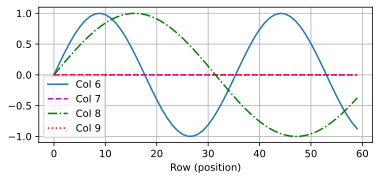

In [20]:
encoding_dim, num_steps = 32, 60
pos_encoding = PositionalEncoding(encoding_dim, 0)
pos_encoding.eval()
X = pos_encoding(torch.zeros((1, num_steps, encoding_dim)))
P = pos_encoding.P[:, :X.shape[1], :]
dltools.plot(torch.arange(num_steps), P[0, :, 6:10].T, xlabel='Row (position)',figsize=(6, 2.5), legend=["Col %d" % d for d in torch.arange(6, 10)])

In [8]:
# 绝对位置信息
for i in range(8):
    print(f'{i}的二进制是：{i:>03b}')

0的二进制是：000
1的二进制是：001
2的二进制是：010
3的二进制是：011
4的二进制是：100
5的二进制是：101
6的二进制是：110
7的二进制是：111


In [ ]:
torch.arange(1000, dtype=torch.float32).reshape(-1, 1).shape

In [ ]:
torch.arange(0, 32, 2, dtype=torch.float32).shape